<a href="https://colab.research.google.com/github/kanakdas123/Computer-Vision-Advanced/blob/master/predict_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randn
plt.style.use("seaborn")
import pandas_datareader.data as web
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix

In [ ]:
start = datetime(2008, 8, 1)
# end is current expiry date
end = datetime.now()

In [ ]:
df = web.DataReader('^NSEI', 'yahoo', start, end)
df.dropna(inplace=True)

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2008-08-01,4422.950195,4235.700195,4331.600098,4413.549805,0.0,4413.549805
1,2008-08-04,4436.149902,4362.899902,4426.100098,4395.350098,0.0,4395.350098
2,2008-08-05,4515.149902,4376.000000,4395.799805,4502.850098,0.0,4502.850098
3,2008-08-06,4615.899902,4503.899902,4506.250000,4517.549805,0.0,4517.549805
4,2008-08-07,4580.149902,4493.700195,4515.250000,4523.850098,0.0,4523.850098


In [ ]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
2933,2020-08-13,11359.299805,11269.950195,11334.849609,11300.450195,562400.0,11300.450195
2934,2020-08-14,11366.250000,11111.450195,11353.299805,11178.400391,645100.0,11178.400391
2935,2020-08-17,11267.099609,11144.500000,11248.900391,11247.099609,634000.0,11247.099609
2936,2020-08-18,11401.700195,11253.150391,11259.799805,11385.349609,579200.0,11385.349609
2937,2020-08-19,11460.349609,11419.700195,11452.150391,11435.799805,0.0,11435.799805


In [ ]:
df1=df.reset_index()['Close'].tail(1000)

In [ ]:
df1

1938     8541.200195
1939     8635.650391
1940     8590.650391
1941     8615.799805
1942     8666.299805
            ...     
2933    11300.450195
2934    11178.400391
2935    11247.099609
2936    11385.349609
2937    11435.799805
Name: Close, Length: 1000, dtype: float64

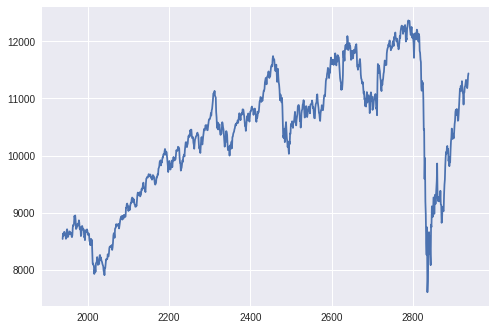

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1);

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

1938     8541.200195
1939     8635.650391
1940     8590.650391
1941     8615.799805
1942     8666.299805
            ...     
2933    11300.450195
2934    11178.400391
2935    11247.099609
2936    11385.349609
2937    11435.799805
Name: Close, Length: 1000, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.19590497]
 [0.21578065]
 [0.20631105]
 [0.21160338]
 [0.22223037]
 [0.21638031]
 [0.21596992]
 [0.2130976 ]
 [0.19667294]
 [0.19798816]
 [0.22577634]
 [0.23171045]
 [0.22474512]
 [0.20308074]
 [0.2066267 ]
 [0.21723253]
 [0.21333947]
 [0.22369294]
 [0.22235676]
 [0.21441282]
 [0.21513866]
 [0.21886341]
 [0.20663719]
 [0.20250205]
 [0.20984633]
 [0.23865482]
 [0.24746167]
 [0.24503118]
 [0.25239643]
 [0.28045792]
 [0.27518655]
 [0.28245706]
 [0.26440173]
 [0.2326048 ]
 [0.23491959]
 [0.23827608]
 [0.24612528]
 [0.25213338]
 [0.24529423]
 [0.24555727]
 [0.26455956]
 [0.25700484]
 [0.23417259]
 [0.23066896]
 [0.23882334]
 [0.20643723]
 [0.21062498]
 [0.2373396 ]
 [0.24387379]
 [0.23857077]
 [0.23133171]
 [0.22881696]
 [0.23117388]
 [0.20267035]
 [0.20478539]
 [0.19152796]
 [0.22467155]
 [0.2207152 ]
 [0.22919591]
 [0.22785952]
 [0.23120553]
 [0.22749126]
 [0.21148768]
 [0.21148768]
 [0.21627509]
 [0.21380247]
 [0.19018109]
 [0.18406798]
 [0.17329364]
 [0.18661416]
 [0.19639942]
 [0.17

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(750, 250)

In [ ]:
train_data

array([[0.19590497],
       [0.21578065],
       [0.20631105],
       [0.21160338],
       [0.22223037],
       [0.21638031],
       [0.21596992],
       [0.2130976 ],
       [0.19667294],
       [0.19798816],
       [0.22577634],
       [0.23171045],
       [0.22474512],
       [0.20308074],
       [0.2066267 ],
       [0.21723253],
       [0.21333947],
       [0.22369294],
       [0.22235676],
       [0.21441282],
       [0.21513866],
       [0.21886341],
       [0.20663719],
       [0.20250205],
       [0.20984633],
       [0.23865482],
       [0.24746167],
       [0.24503118],
       [0.25239643],
       [0.28045792],
       [0.27518655],
       [0.28245706],
       [0.26440173],
       [0.2326048 ],
       [0.23491959],
       [0.23827608],
       [0.24612528],
       [0.25213338],
       [0.24529423],
       [0.24555727],
       [0.26455956],
       [0.25700484],
       [0.23417259],
       [0.23066896],
       [0.23882334],
       [0.20643723],
       [0.21062498],
       [0.237

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(649, 100)
(649,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(149, 100)
(149,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 1s 101ms/step - loss: 0.1101 - val_loss: 0.0341
Epoch 2/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0126 - val_loss: 0.0374
Epoch 3/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0067 - val_loss: 0.0320
Epoch 4/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0046 - val_loss: 0.0325
Epoch 5/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 0.0303
Epoch 6/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0027 - val_loss: 0.0300
Epoch 7/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0026 - val_loss: 0.0302
Epoch 8/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0025 - val_loss: 0.0294
Epoch 9/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0025 - val_loss: 0.0286
Epoch 10/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0027 - val_loss: 0.027

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10495.578723835886

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

10558.014356815997

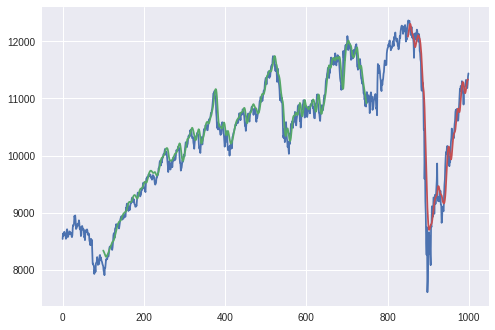

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

250

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.1489040810719222,
 0.2170011337623834,
 0.22095728015397964,
 0.14117057626653295,
 0.2078050610971951,
 0.13542572808321407,
 0.09965169224876025,
 0.24872428612734754,
 0.2395808223383864,
 0.3160005581472962,
 0.29115848239010345,
 0.2767331696293067,
 0.29093756621063394,
 0.3485864138810164,
 0.3475551977055953,
 0.28854920543129103,
 0.33186727191534726,
 0.3585085301388238,
 0.3249440671059096,
 0.35185864488165985,
 0.3726077089676967,
 0.40889714738643845,
 0.47340631581889325,
 0.3542155636373201,
 0.3357182005544894,
 0.34945980342775607,
 0.3343398890980229,
 0.345377272431161,
 0.34278895682147037,
 0.33381380033575137,
 0.3731652397536507,
 0.32249241127235595,
 0.3212507595920264,
 0.25525826745407354,
 0.2670110082018471,
 0.3064571846976396,
 0.31481151534319385,
 0.3007123365143207,
 0.2985658532635691,
 0.35872944631829307,
 0.39558710170097244,
 0.4145684253444084,
 0.46630411752822964,
 0.49849006360125414,
 0.5158405120816492,
 0.5090118388466818,
 0.5328017370

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array
 
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
 
print(lst_output)

[0.78848106]
101
1 day input [0.21700113 0.22095728 0.14117058 0.20780506 0.13542573 0.09965169
 0.24872429 0.23958082 0.31600056 0.29115848 0.27673317 0.29093757
 0.34858641 0.3475552  0.28854921 0.33186727 0.35850853 0.32494407
 0.35185864 0.37260771 0.40889715 0.47340632 0.35421556 0.3357182
 0.3494598  0.33433989 0.34537727 0.34278896 0.3338138  0.37316524
 0.32249241 0.32125076 0.25525827 0.26701101 0.30645718 0.31481152
 0.30071234 0.29856585 0.35872945 0.3955871  0.41456843 0.46630412
 0.49849006 0.51584051 0.50901184 0.53280174 0.53812571 0.51270515
 0.52733041 0.48226557 0.49718553 0.46368415 0.48479079 0.47787807
 0.52217474 0.55431877 0.56837582 0.60200337 0.56713417 0.56368315
 0.58348505 0.56862838 0.56646073 0.593386   0.61898556 0.63069617
 0.6635874  0.67116308 0.65140311 0.67406705 0.6645132  0.67180487
 0.63069617 0.63297952 0.65860004 0.69263798 0.71799546 0.74746691
 0.74122742 0.75866212 0.75417989 0.74105911 0.7765701  0.75601051
 0.73481982 0.72878028 0.69051246 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1000

In [ ]:
t = len(df1)-100

In [ ]:
t

900

array([[11357.15125144],
       [11379.16499382],
       [11398.29332712],
       [11414.5135918 ],
       [11428.66447406],
       [11441.58692604],
       [11453.85876601],
       [11465.80147617],
       [11477.56121055],
       [11489.18895311]])

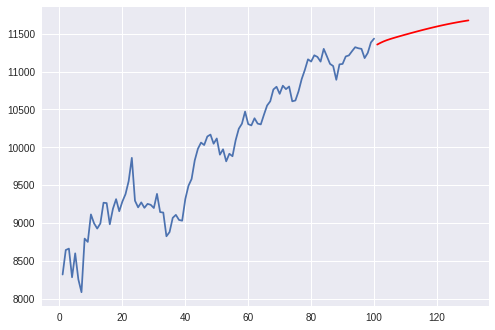

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[t:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output),'r')
scaler.inverse_transform(lst_output)[:10]

In [ ]:
 ### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10495.578723835886

In [ ]:
 ### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

10558.014356815997

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2938.0,7514.251281,2500.419676,2585.300049,5421.974976,7580.000000,9637.137451,1.243050e+04
Low,2938.0,7416.293802,2492.145123,2252.750000,5348.375122,7480.349854,9564.174805,1.232140e+04
Open,2938.0,7471.102368,2499.672474,2553.600098,5386.212646,7535.324951,9601.524902,1.243050e+04
Close,2938.0,7465.539980,2495.582225,2524.199951,5381.950073,7532.674805,9611.699951,1.236230e+04
Volume,2938.0,170330.462900,204924.894871,0.000000,0.000000,146700.000000,220825.000000,1.811000e+06
Adj Close,2938.0,7465.539980,2495.582225,2524.199951,5381.950073,7532.674805,9611.699951,1.236230e+04


In [ ]:
dfr

NameError: ignored

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1240:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
 
plt.plot(df3, 'r')

 # REDLINE CURVE IS PREDICTED LINE: THANK YOU